In [2]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2

In [2]:

np.random.seed(0)

x = np.array(Image.open('../testset/10081.jpg'))/255.
r,l,_ = np.shape(x)
delta= 0.03
# print(np.random.normal(0,1,x.shape).shape)
z = x+ delta*np.random.normal(0,1,x.shape)



In [3]:

## Without GGS
slpam_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=8,
        lamb=2e-3,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=500,
        method="SLPAM",
        noised_image_input=z,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        eps_AT_min=0.02,
        A=np.ones((r,l)))
palm_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=8,
        lamb=7e-2,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=500,
        method="PALM",
        noised_image_input=z,
        optD="OptD",
        eps_AT_min=0.02,
        A=np.ones((r,l)))



Color image
Image is already in float [0,1] 

Color image
Image is already in float [0,1] 



In [4]:

## Without GGS
slpam_at_solver = DMS(
        norm_type="AT",
        edges="similar",
        beta=8,
        lamb=2e-3,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=500,
        method="SLPAM-eps-descent",
        noised_image_input=z,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        eps_AT_min=0.02,
        A=np.ones((r,l)))
palm_at_solver = DMS(
        norm_type="AT",
        edges="similar",
        beta=8,
        lamb=7e-2,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=500,
        method="PALM-eps-descent",
        noised_image_input=z,
        optD="OptD",
        eps_AT_min=0.02,
        A=np.ones((r,l)))



Color image
Image is already in float [0,1] 

Color image
Image is already in float [0,1] 



In [6]:
time1 = time.time()
out_slpam = slpam_solver.process()
time_slpam = time.time()-time1

100%|█████████████████████████████████████████████████████████████| 500/500 [01:01<00:00,  8.13it/s]


In [7]:
time2 = time.time()
out_palm = palm_solver.process()
time_palm= time.time()-time2

print("SLPAM-CT:",time_slpam)
print("PALM-CT:",time_palm)



100%|█████████████████████████████████████████████████████████████| 500/500 [00:59<00:00,  8.38it/s]

SLPAM-CT: 61.545570373535156
PALM-CT: 59.704073905944824


In [8]:
time1 = time.time()
out_slpam_at = slpam_at_solver.process()
time_slpam_at = time.time()-time1

0.2
0.13333333333333333
0.08888888888888889
0.05925925925925926
0.03950617283950617
0.02633744855967078


In [9]:
time2 = time.time()
out_palm_at = palm_at_solver.process()
time_palm_at= time.time()-time2

Epsilon:  0.2
Epsilon:  0.13333333333333333
Epsilon:  0.08888888888888889
Epsilon:  0.05925925925925926
Epsilon:  0.03950617283950617
Epsilon:  0.02633744855967078


In [11]:
print("SLPAM-CT:",time_slpam_at)
print("PALM-CT:",time_palm_at)

SLPAM-CT: 642.6044445037842
PALM-CT: 366.2481083869934


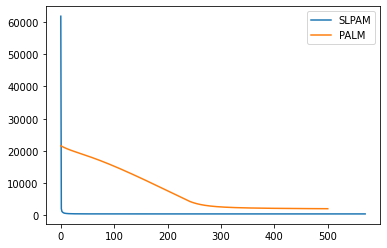

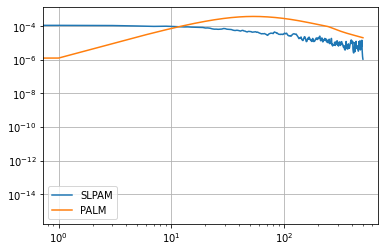

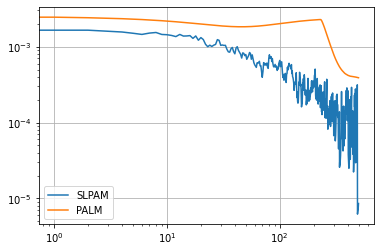

In [12]:
plt.figure()
plt.plot(out_slpam[2],label='SLPAM')
plt.plot(out_palm[2],label='PALM')
plt.legend()
plt.figure()
plt.grid("on")
plt.loglog(out_slpam[3],label='SLPAM')
plt.loglog(out_palm[3],label='PALM')
plt.legend()
plt.figure()
plt.grid("on")
plt.loglog(out_slpam[4],label='SLPAM')
plt.loglog(out_palm[4],label='PALM')
plt.legend()


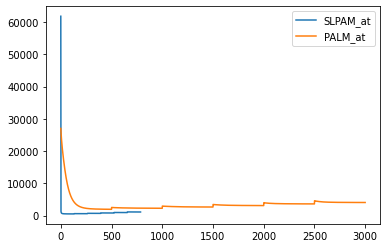

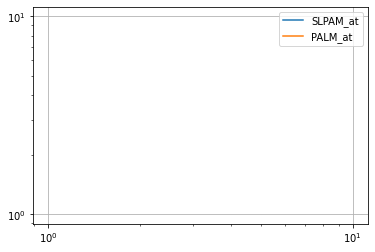

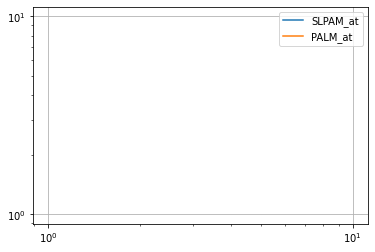

In [13]:
plt.figure()
plt.plot(out_slpam_at[2],label='SLPAM_at')
plt.plot(out_palm_at[2],label='PALM_at')
plt.legend()
plt.figure()
plt.grid("on")
plt.loglog(out_slpam_at[3],label='SLPAM_at')
plt.loglog(out_palm_at[3],label='PALM_at')
plt.legend()
plt.figure()
plt.grid("on")
plt.loglog(out_slpam_at[4],label='SLPAM_at')
plt.loglog(out_palm_at[4],label='PALM_at')
plt.legend()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 480.5, 320.5, -0.5)

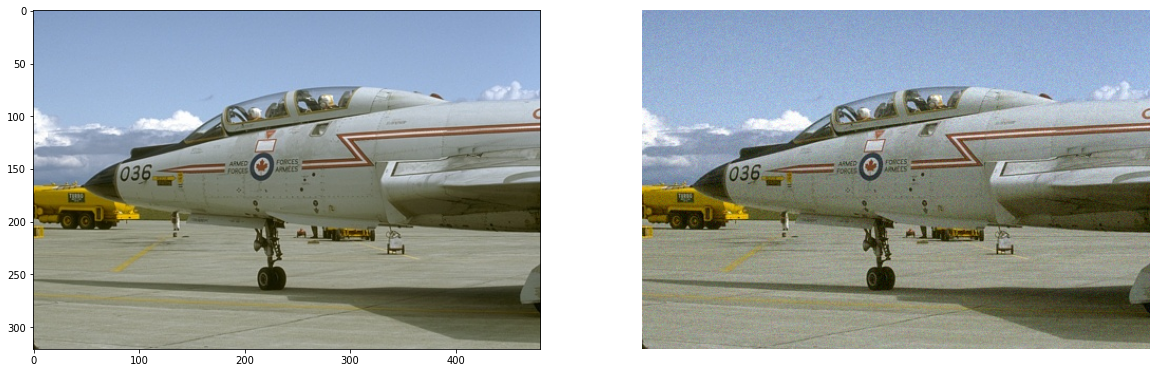

In [14]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(z)
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 480.5, 320.5, -0.5)

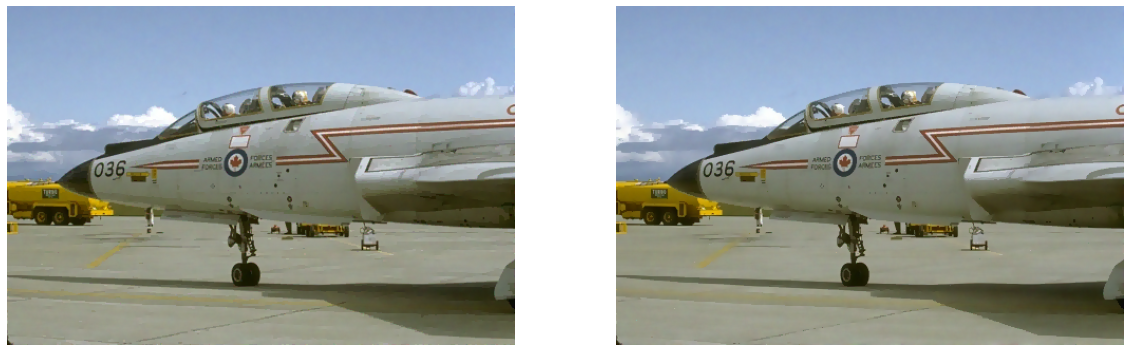

In [24]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.imshow(out_slpam[1])
plt.subplot(122)
plt.imshow(out_palm[1])
plt.axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 480.5, 320.5, -0.5)

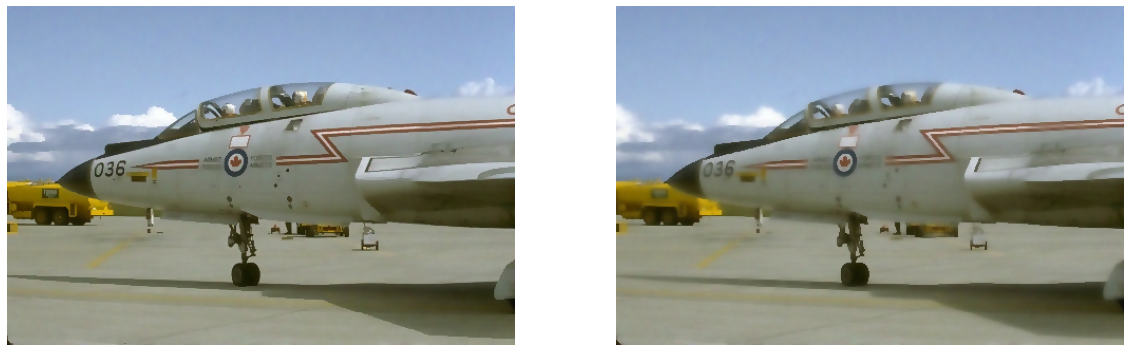

In [25]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.imshow(out_slpam_at[1])
plt.subplot(122)
plt.imshow(out_palm_at[1])
plt.axis('off')


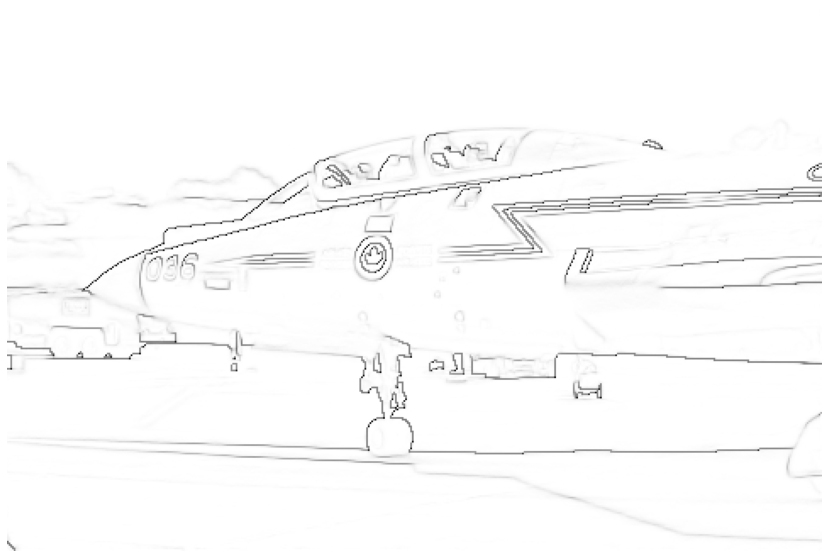

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(out_palm_at[0][:,:,0]+out_palm_at[0][:,:,1],cmap='gray_r')
plt.axis('off')
plt.show()

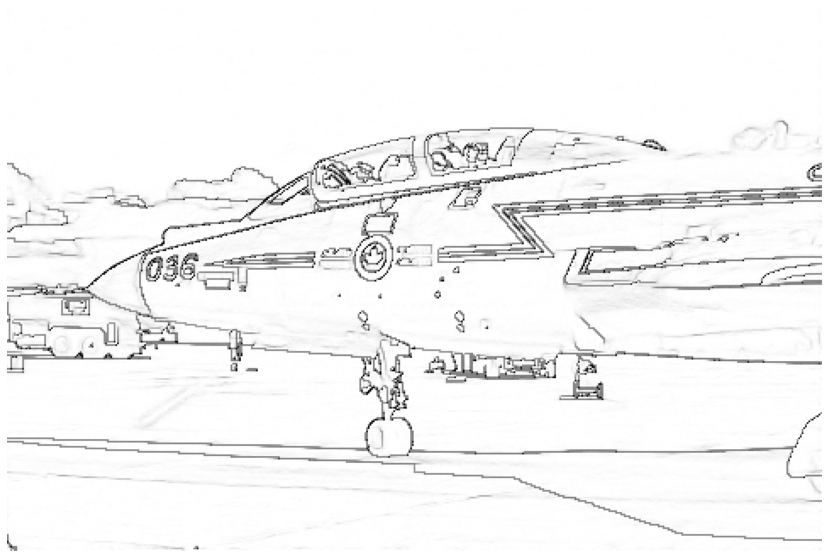

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(out_slpam_at[0][:,:,0]+out_slpam_at[0][:,:,1],cmap='gray_r')
plt.axis('off')
plt.show()

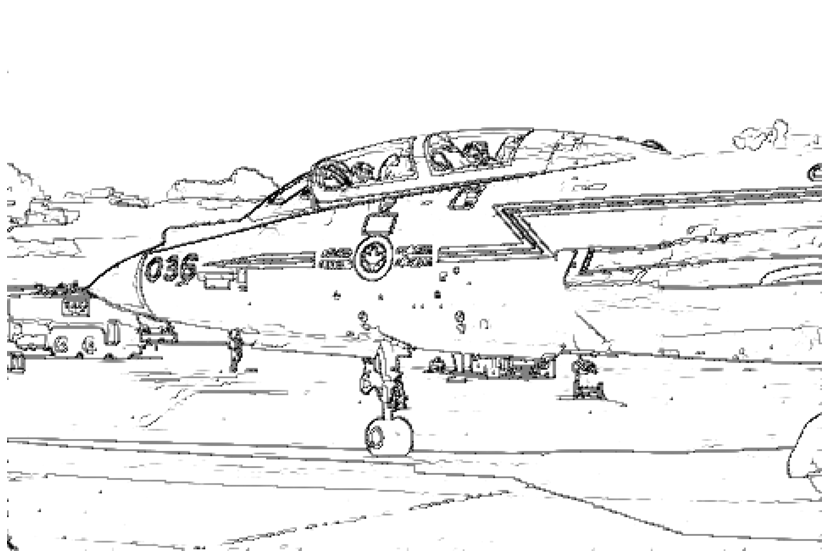

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(out_palm[0][:,:,0]+out_palm[0][:,:,1],cmap='gray_r')
plt.axis('off')
plt.show()

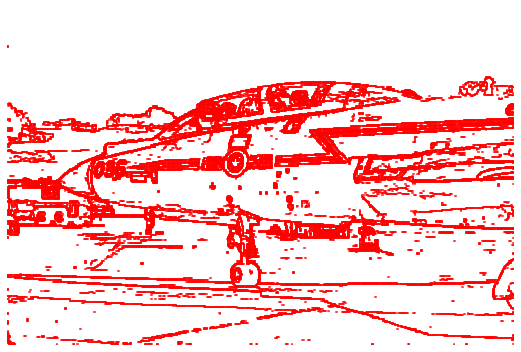

In [17]:
plt.figure(figsize=(20,10))
# ax1=plt.subplot(121)
# plt.imshow(np.ones_like(x))
# draw_contour(out_slpam[0], '', fig=ax1, color="r", threshold=0.)
# plt.axis('off')
ax2=plt.subplot(122)
plt.imshow(np.ones_like(x))
draw_contour(out_palm[0], '', fig=ax2, color="r", threshold=0.)
plt.axis('off')
plt.show()

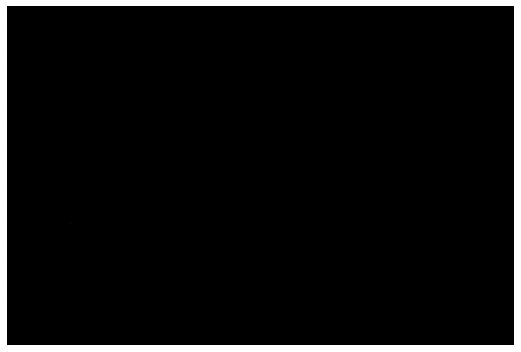

In [18]:
plt.figure(figsize=(20,10))
# ax1=plt.subplot(121)
# plt.imshow(np.ones_like(x))
# draw_contour(out_slpam[0], '', fig=ax1, color="r", threshold=0.)
# plt.axis('off')
ax2=plt.subplot(122)
plt.imshow(np.ones_like(x))
draw_contour(out_palm_at[0], '', fig=ax2, color="k", threshold=0.)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(121)
plt.imshow(out_slpam[0][:,:,0],cmap='gray')
plt.axis('off')
ax2=plt.subplot(122)
plt.imshow(np.ones_like(x))
plt.imshow(out_palm[0][:,:,0],cmap='gray')
plt.axis('off')
plt.show()

In [20]:
out_palm_at[0]

array([[[ 2.52151927e-03,  1.20805254e-03],
        [ 2.04202053e-03,  4.04634764e-03],
        [ 5.23156537e-04,  4.73951367e-04],
        ...,
        [ 1.31717395e-03,  4.47957723e-04],
        [ 3.28558386e-03,  2.36623558e-04],
        [ 8.67173100e-07,  2.33216842e-03]],

       [[ 3.33014800e-03,  2.68518145e-03],
        [ 2.16457073e-03,  3.65448131e-04],
        [ 9.57710146e-04,  1.66809592e-04],
        ...,
        [ 1.44616806e-03,  1.24799311e-03],
        [ 6.87460309e-03,  7.85210518e-04],
        [-9.93958490e-07,  1.62656674e-03]],

       [[ 7.64068871e-04,  3.48990331e-03],
        [ 1.47809809e-03,  4.02833302e-03],
        [ 1.22298857e-03,  4.78454824e-03],
        ...,
        [ 2.25197555e-03,  7.04402088e-04],
        [ 8.84462245e-03,  8.40896725e-04],
        [-7.91615572e-07,  3.11718629e-03]],

       ...,

       [[ 1.77100403e-02,  1.49577876e-02],
        [ 3.23258625e-02,  2.11804730e-02],
        [ 9.03336959e-01,  2.47849516e-02],
        ...,
     

In [ ]:
plt.figure()
plt.hist(out_slpam[0][:,:,0].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_slpam[0][:,:,1].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_palm[0][:,:,0].flatten(),bins=5)
plt.show()
plt.figure()
plt.hist(out_palm[0][:,:,1].flatten(),bins=5)
plt.show()

In [ ]:
data = scipy.io.loadmat('../testset/data_102061.mat')

In [ ]:
z102061 = data['y_ref']
A = data['otfA']
X_ref= data['f']

In [ ]:

## Without GGS
slpam_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=5,
        lamb=1.5e-3,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=500,
        method="SLPAM",
        noised_image_input=z102061,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        eps_AT_min=0.02,
        A=A)
# palm_solver = DMS(
#         norm_type="l1",
#         edges="similar",
#         beta=8,
#         lamb=7e-2,
#         eps=0.2,
#         stop_criterion=1e-4,
#         MaximumIteration=500,
#         method="PALM",
#         noised_image_input=z,
#         optD="OptD",
#         eps_AT_min=0.02,
#         A=np.ones((r,l)))



In [ ]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(x_ref)
plt.axis('off')
plt.subplot(122)
plt.imshow(noised_image_input)
plt.axis('off')
plt.show()

In [ ]:
time1 = time.time()
out_slpam = slpam_solver.process()
time_slpam = time.time()-time1

In [ ]:

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.imshow(out_slpam[1])
# plt.subplot(122)
# plt.imshow(out_palm[1])
plt.axis('off')


In [ ]:
X_est = out_slpam[1]

In [ ]:
scipy.io.savemat('SLPAML1_IR_102061.mat',dict(x_ref=X_ref,res=X_est,y_ref=z102061))

In [ ]:
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
cont_norm = normalize(out_slpam[0][:,:,0]+out_slpam[0][:,:,1])

In [ ]:
plt.imsave(fname='my_image.png', arr=np.clip(X_est,0,1), format='png')

In [ ]:
plt.imsave(fname='cont_SLPAML1_102061.png', arr=cont_norm,cmap='gray_r', format='png')

In [ ]:
zx = 128
zy = 128
scale = 2
rect = [100, 100, zx, zy]

# Assuming `res` is your input image as a NumPy array

# Crop the region of interest
roi_xest = cont_norm[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]

# Resize the cropped region of interest
zoom_roi_cont = zoom_roi = np.kron(roi_xest, np.ones((scale, scale)))


In [ ]:
plt.imsave(fname='zoom_cont_SLPAML1_102061.png', arr=zoom_roi_cont,cmap='gray_r', format='png')

In [ ]:
plt.hist(zoom_roi_cont)

In [ ]:
plt.imshow(zoom_roi_cont,cmap='gray_r')

In [ ]:
x.shape

In [ ]:
ax1=plt.figure(figsize=(np.shape(x)[1]//15,np.shape(x)[0]//15))
plt.imshow(np.ones_like(x_ref))
draw_contour(out_slpam[0], '', fig=ax1, color="k", threshold=0.)
plt.axis('off')
# ax2=plt.subplot(122)
# plt.imshow(np.ones_like(x))
# draw_contour(out_palm[0], '', fig=ax2, color="r", threshold=0.)
# plt.axis('off')
plt.savefig("cont_SLPAML1_102061.png", bbox_inches='tight', pad_inches=0,dpi=300,transparent=True)
plt.show()


In [ ]:
zoom_cont= out_slpam[0][rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]


In [ ]:
ax2=plt.figure(figsize=(20,20))
plt.imshow(np.ones((128,128)),cmap='gray_r')
draw_contour(zoom_cont, '', fig=ax2, color="k", threshold=0.)
plt.axis('off')
# ax2=plt.subplot(122)
# plt.imshow(np.ones_like(x))
# draw_contour(out_palm[0], '', fig=ax2, color="r", threshold=0.)
# plt.axis('off')
plt.savefig("zoom_cont_SLPAML1_102061.png", bbox_inches='tight', pad_inches=0,dpi=300,transparent=True)
plt.show()
